In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('project1.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df.head(5)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [10]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

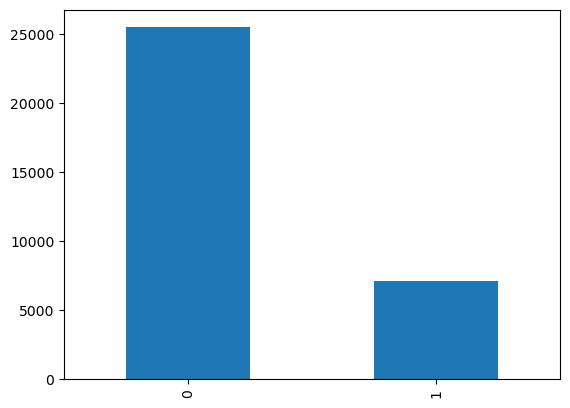

In [43]:
# Checking the distribution of Target by graph
df["loan_status"].value_counts().plot(kind = "bar")
plt.show()

In [44]:
#handling imbalanced dataset
df_0 = df[df['loan_status'] == 0]
df_1 = df[df['loan_status'] == 1]
print('df_0', df_0.shape)
print('df_1', df_1.shape)

df_0 (25473, 12)
df_1 (7108, 12)


In [45]:
#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(df_1, replace = True, n_samples = 25473)
df = pd.concat([df_0, df_minority_upsampled])

In [46]:
from sklearn.utils import shuffle
df = shuffle(df)

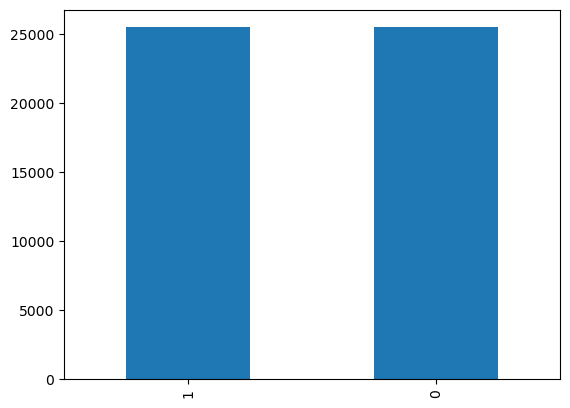

In [47]:
# Checking the distribution of Target by graph
df["loan_status"].value_counts().plot(kind = "bar")
plt.show()

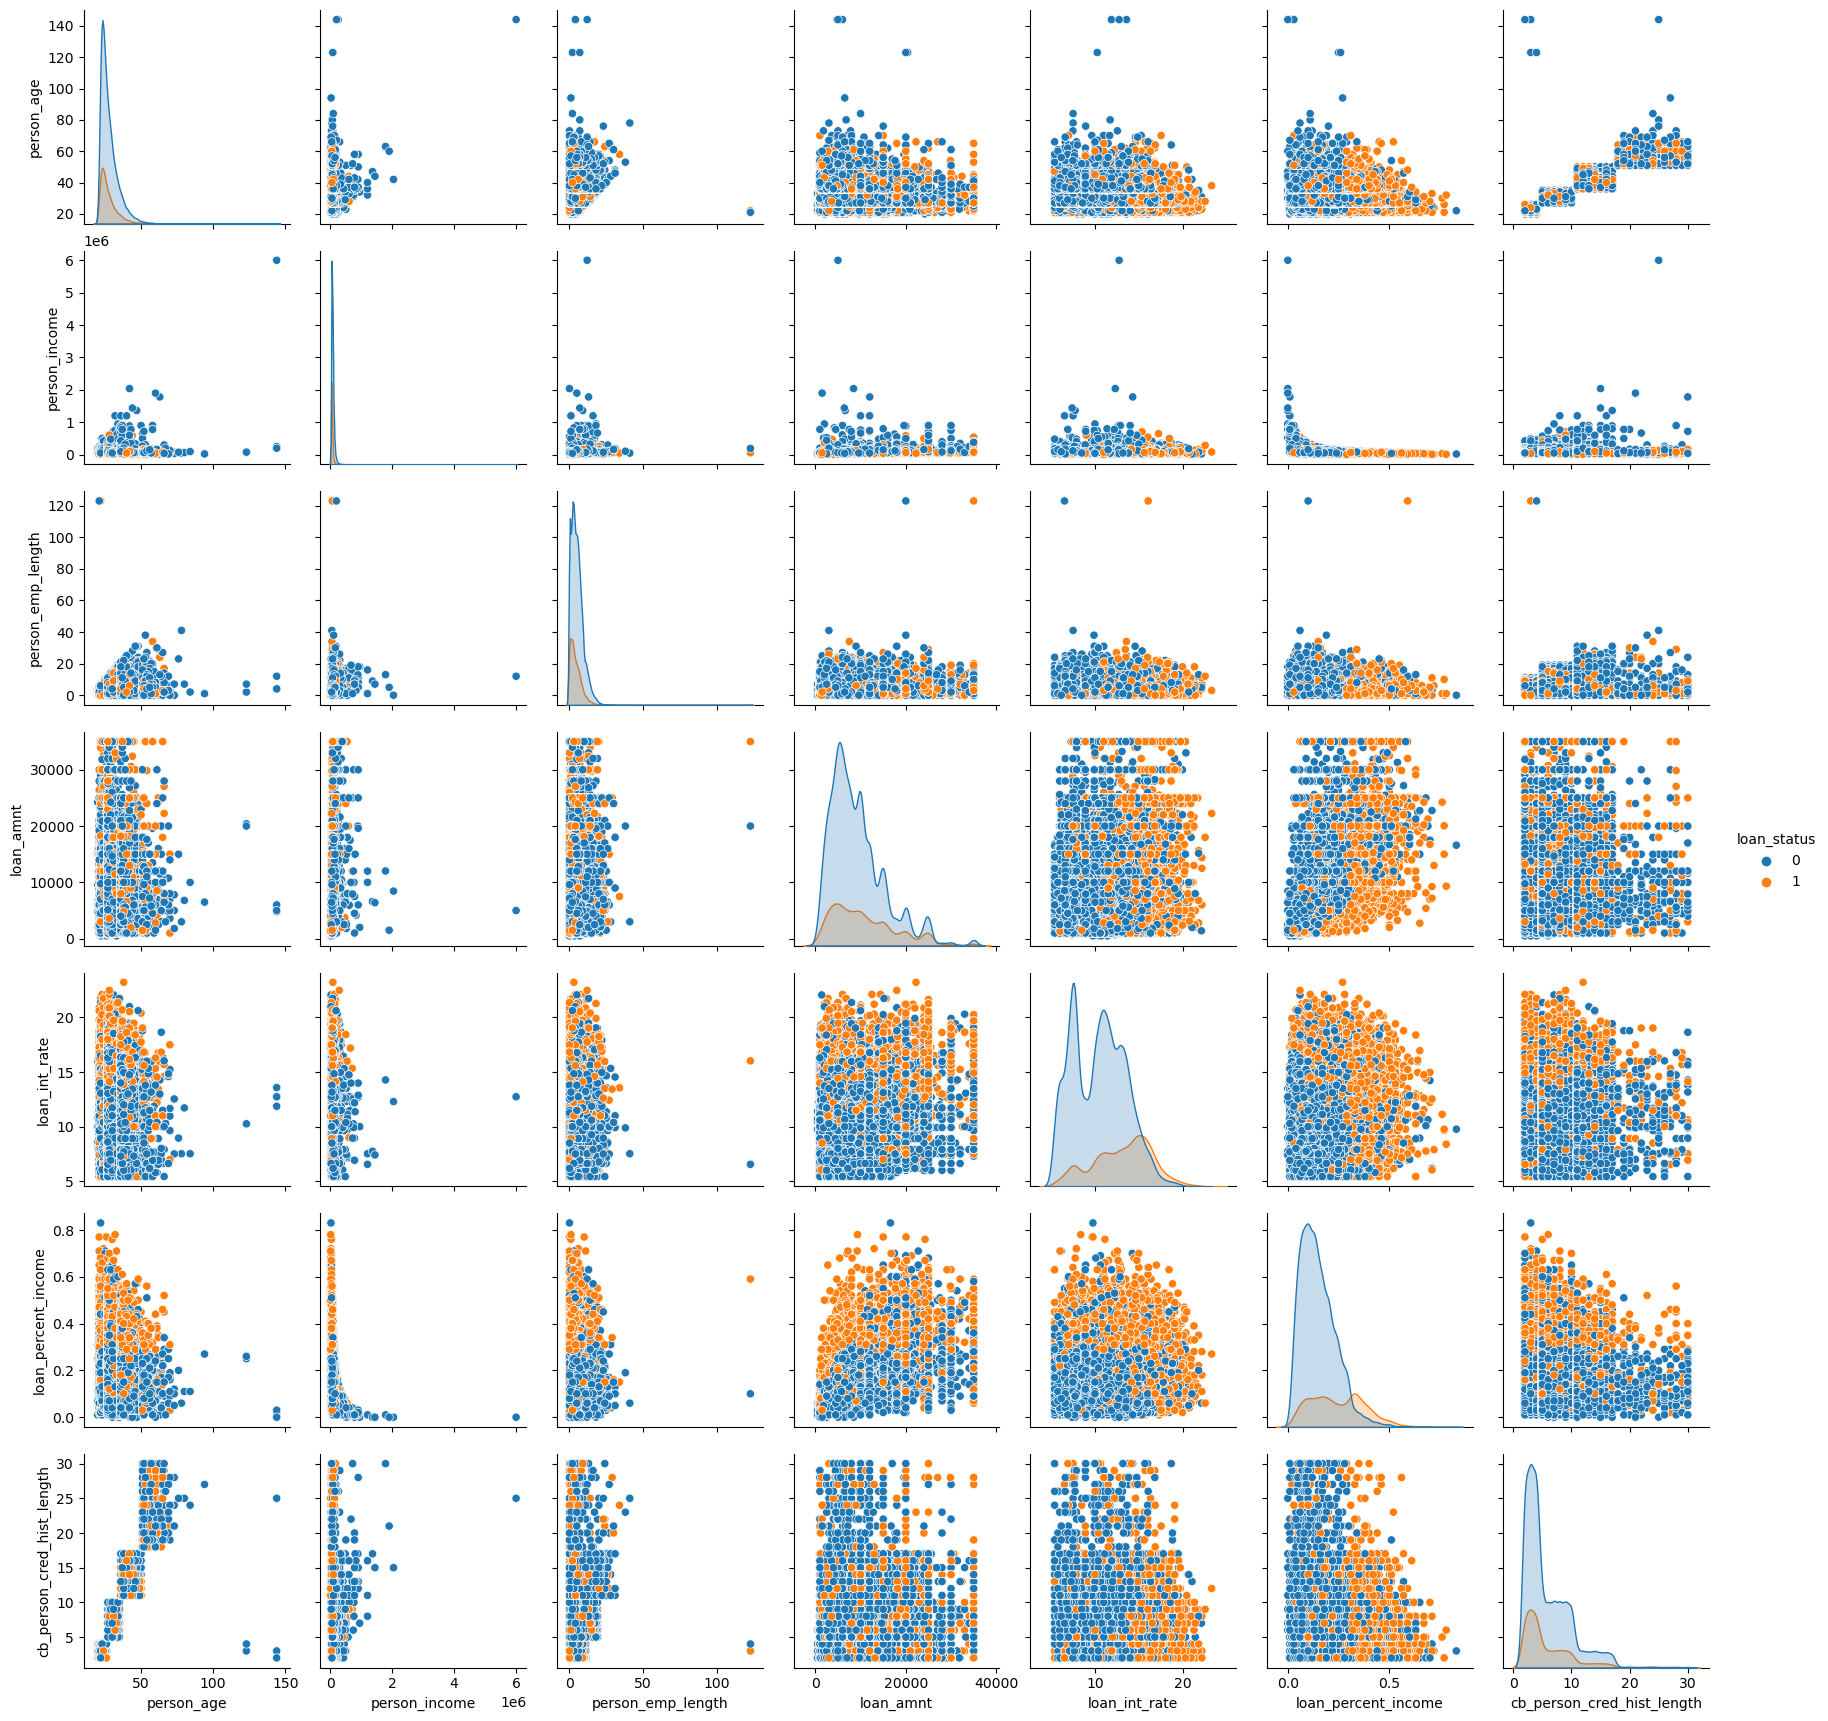

In [14]:
sns.pairplot(df, hue='loan_status')
plt.show()

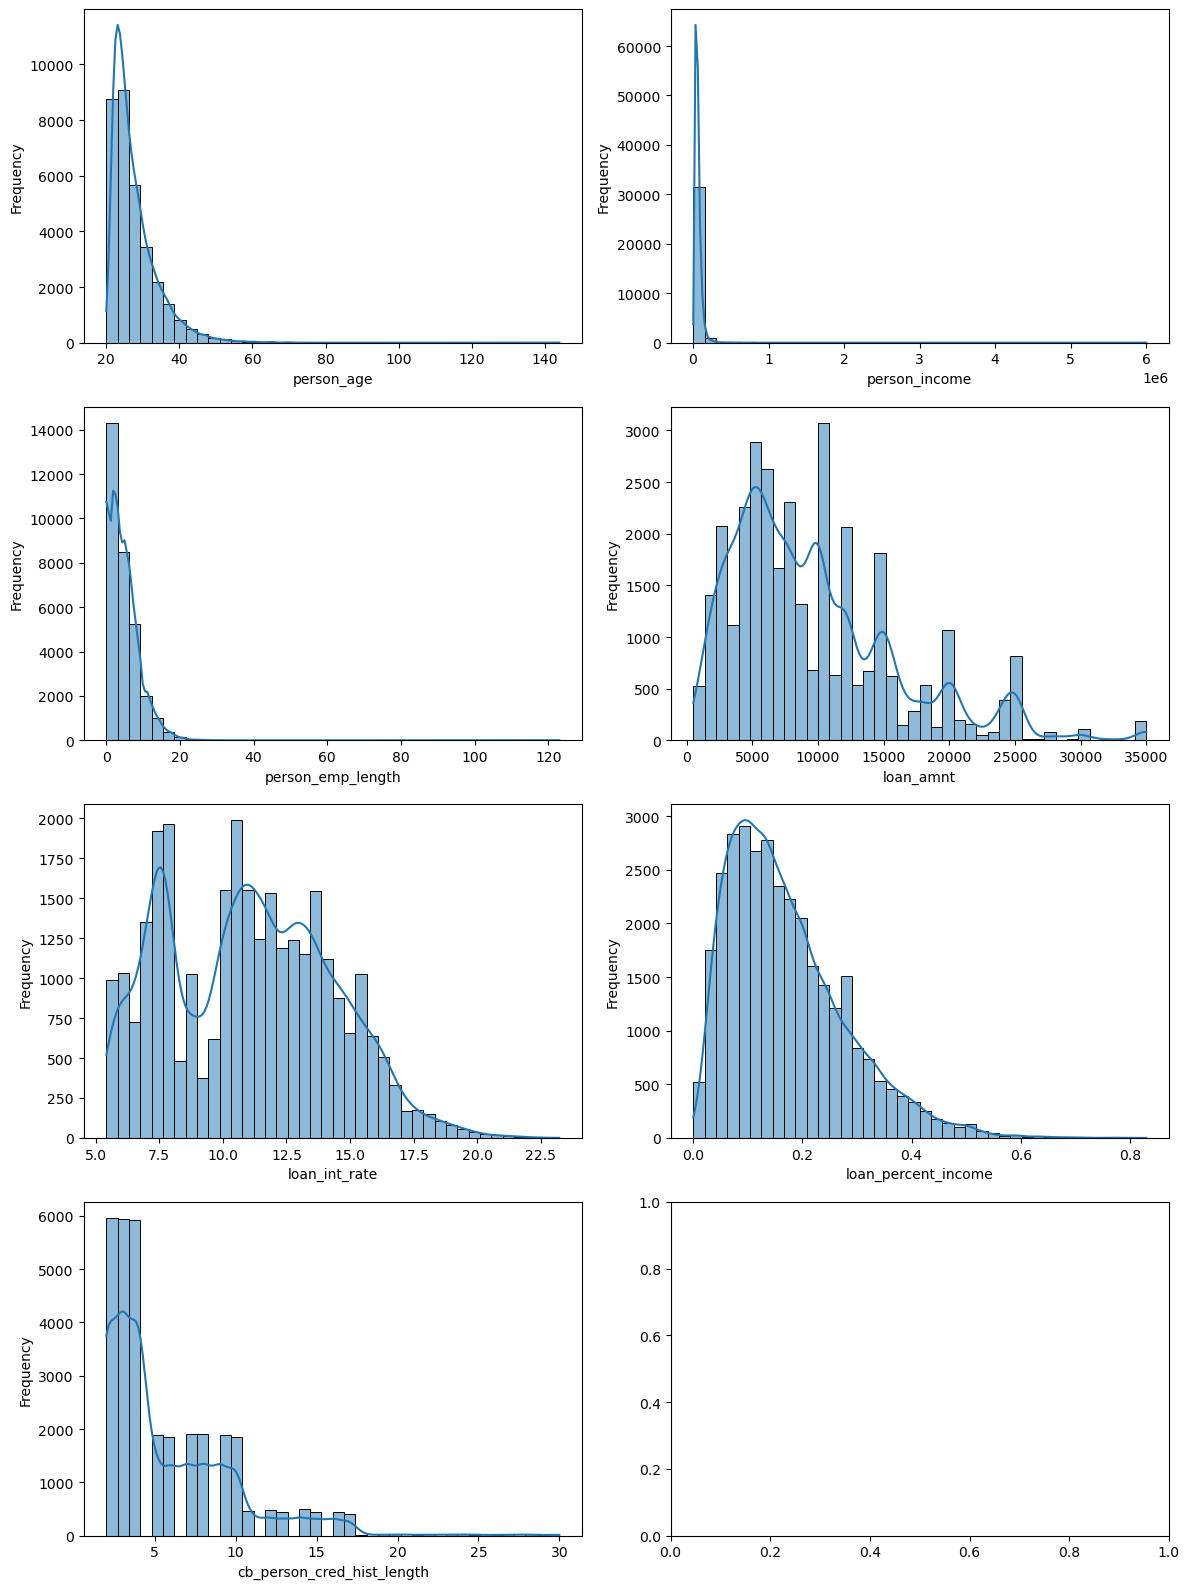

In [15]:
# List of column names for which you want to create histograms
columns_to_plot = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Set up subplots
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Loop through columns and create histograms
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], kde=True, bins=40, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [48]:
# Calculate the first and third quartiles and the IQR for each numeric column
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Loop through numeric columns and remove outliers using the IQR method
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        lower_bound = Q1[column] - 1.5 * IQR[column]
        upper_bound = Q3[column] + 1.5 * IQR[column]
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Now 'df_cleaned' contains the data with outliers removed using the IQR method


df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44366 entries, 10180 to 24831
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  44366 non-null  int64  
 1   person_income               44366 non-null  int64  
 2   person_home_ownership       44366 non-null  object 
 3   person_emp_length           44366 non-null  float64
 4   loan_intent                 44366 non-null  object 
 5   loan_grade                  44366 non-null  object 
 6   loan_amnt                   44366 non-null  int64  
 7   loan_int_rate               44366 non-null  float64
 8   loan_status                 44366 non-null  int64  
 9   loan_percent_income         44366 non-null  float64
 10  cb_person_default_on_file   44366 non-null  object 
 11  cb_person_cred_hist_length  44366 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.4+ MB


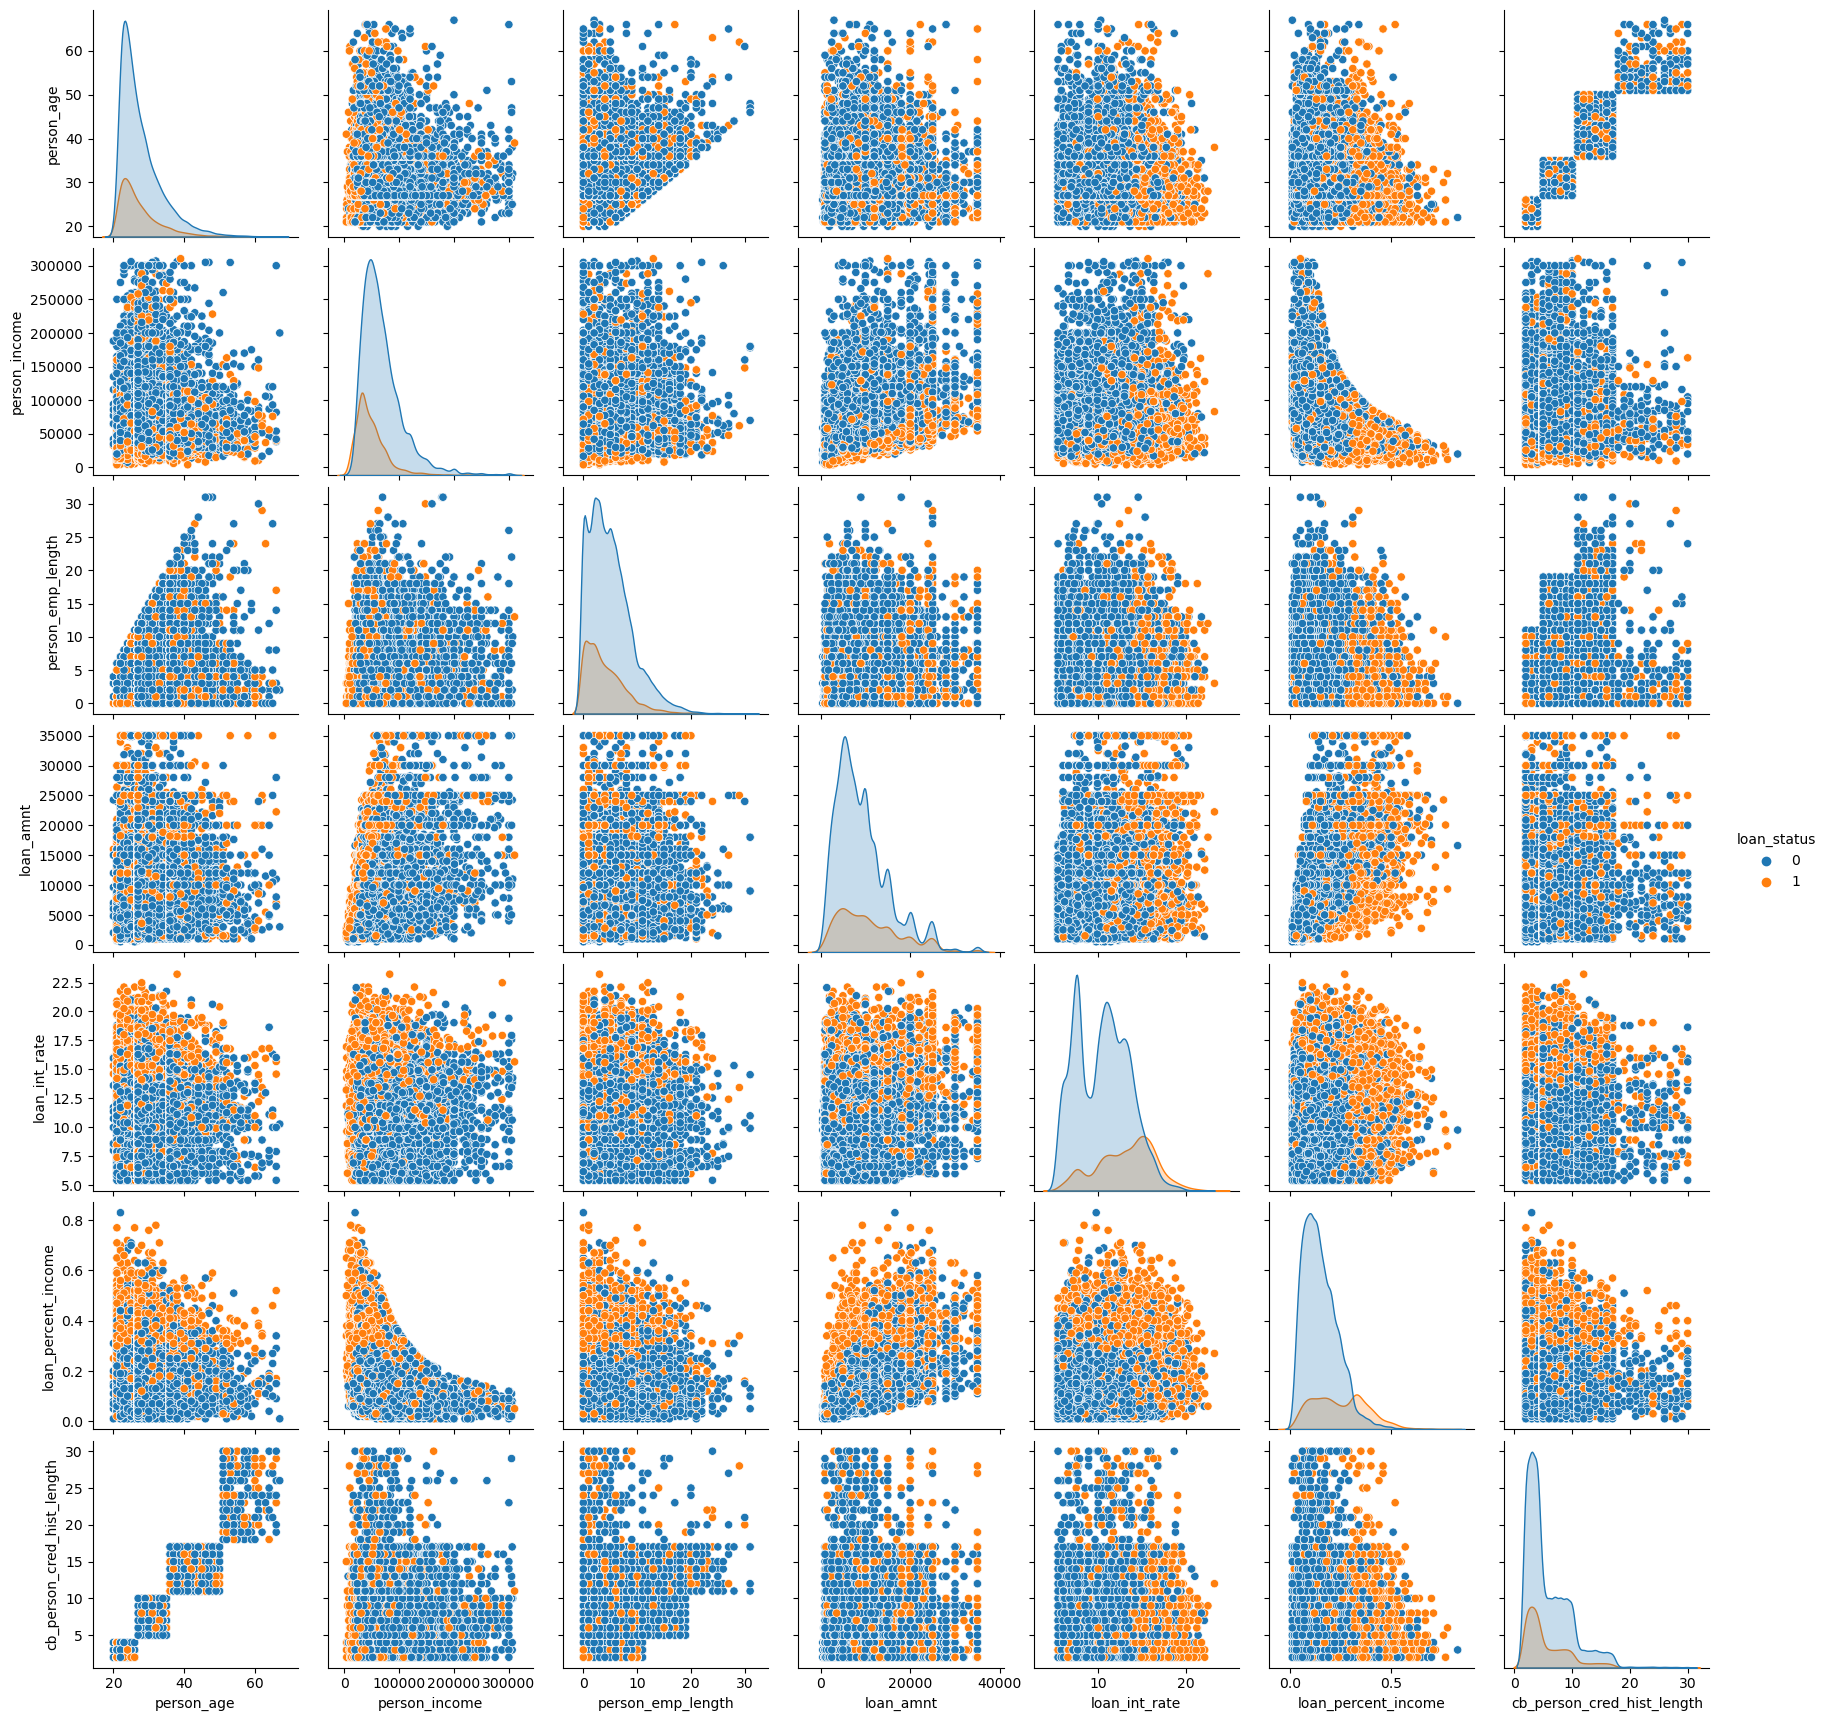

In [23]:
sns.pairplot(df_cleaned, hue='loan_status')
plt.show()

In [49]:
# Assume df is your DataFrame
df_encoded = pd.get_dummies(df_cleaned, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])


In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44366 entries, 10180 to 24831
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44366 non-null  int64  
 1   person_income                   44366 non-null  int64  
 2   person_emp_length               44366 non-null  float64
 3   loan_amnt                       44366 non-null  int64  
 4   loan_int_rate                   44366 non-null  float64
 5   loan_status                     44366 non-null  int64  
 6   loan_percent_income             44366 non-null  float64
 7   cb_person_cred_hist_length      44366 non-null  int64  
 8   person_home_ownership_MORTGAGE  44366 non-null  uint8  
 9   person_home_ownership_OTHER     44366 non-null  uint8  
 10  person_home_ownership_OWN       44366 non-null  uint8  
 11  person_home_ownership_RENT      44366 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATIO

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [51]:
u1=df_encoded
x=u1.drop(columns='loan_status')
X_train,X_test,y_train,y_test=train_test_split(x,u1['loan_status'],random_state=42,test_size=0.20)
X_train.shape

(35492, 26)

In [52]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      4407
           1       0.73      0.77      0.75      4467

    accuracy                           0.74      8874
   macro avg       0.74      0.74      0.74      8874
weighted avg       0.74      0.74      0.74      8874



In [55]:
cm=confusion_matrix(y_test,pred)
cm

array([[3144, 1263],
       [1045, 3422]], dtype=int64)

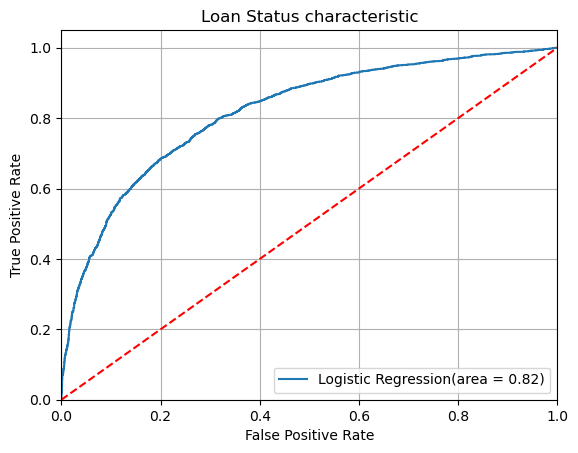

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression(area = %.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Loan Status characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

Feature: person_age, Score: -0.09536
Feature: person_income, Score: -3e-05
Feature: person_emp_length, Score: -0.02107
Feature: loan_amnt, Score: 0.0001
Feature: loan_int_rate, Score: 0.23931
Feature: loan_percent_income, Score: 0.0044
Feature: cb_person_cred_hist_length, Score: 0.12507
Feature: person_home_ownership_MORTGAGE, Score: -0.03165
Feature: person_home_ownership_OTHER, Score: 0.00012
Feature: person_home_ownership_OWN, Score: -0.02709
Feature: person_home_ownership_RENT, Score: 0.04156
Feature: loan_intent_DEBTCONSOLIDATION, Score: 0.01889
Feature: loan_intent_EDUCATION, Score: -0.02478
Feature: loan_intent_HOMEIMPROVEMENT, Score: 0.01367
Feature: loan_intent_MEDICAL, Score: 0.0118
Feature: loan_intent_PERSONAL, Score: -0.00773
Feature: loan_intent_VENTURE, Score: -0.02892
Feature: loan_grade_A, Score: -0.03072
Feature: loan_grade_B, Score: -0.0408
Feature: loan_grade_C, Score: -0.02695
Feature: loan_grade_D, Score: 0.05934
Feature: loan_grade_E, Score: 0.01608
Feature: loan

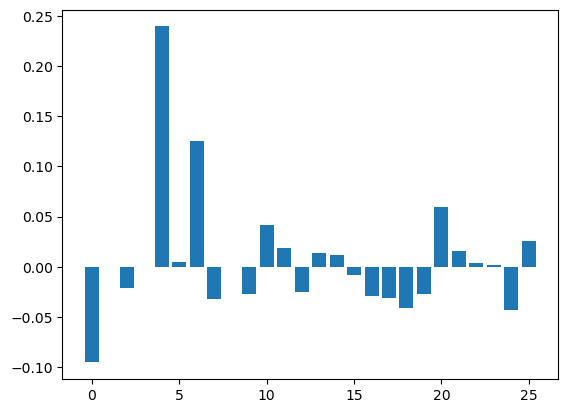

In [56]:
# get importance
importance = model.coef_[0]

# summarize feature importance
for feat,important in zip(x.columns,importance):
    print('Feature: {}, Score: {}' .format(feat,round(important,5)))

from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()